In [24]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pl.read_csv(r'C:\Users\Maxim Shibanov\Projects_Py\Studying-stuff\Basic_python\In_class_10\shopping_mall_data.csv')

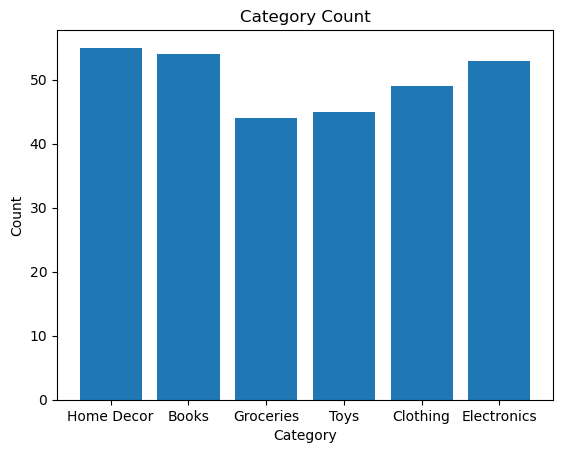

In [4]:
grouped_cat = df.group_by("Product_Category").len()
categories = grouped_cat["Product_Category"].to_list()
counts = grouped_cat["len"]

plt.bar(categories, counts)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Count")
plt.show()


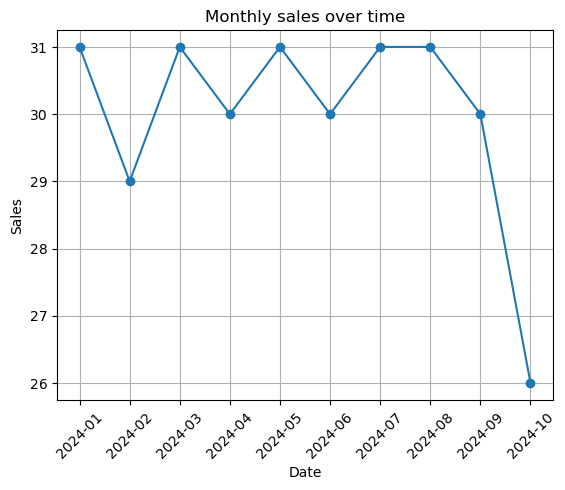

In [5]:
grouped_time = df.with_columns(pl.col("Purchase_Date").str.to_date().alias("Purchase_Date"))
grouped_time = grouped_time.with_columns(
    pl.col("Purchase_Date").dt.strftime("%Y-%m").alias("Y-M")
    )

grouped_time = grouped_time.group_by("Y-M").len().sort("Y-M")

dates = grouped_time["Y-M"]
values = grouped_time["len"]

plt.plot(dates, values, marker="o", linestyle="-")  
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly sales over time")
plt.xticks(rotation=45)  
plt.grid(True)  
plt.show()


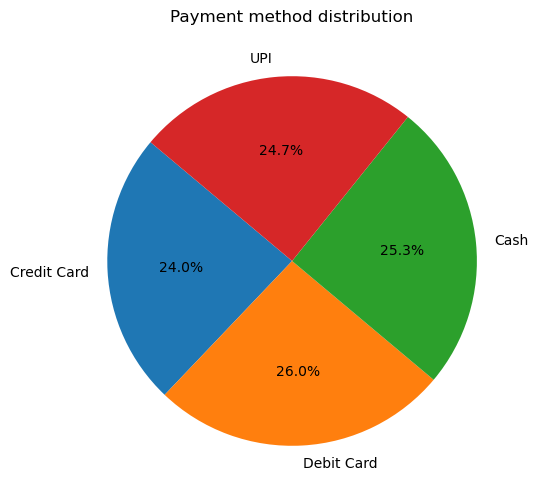

In [ ]:
grouped_pay = df.group_by("Payment_Method").len()
sizes = grouped_pay["len"].to_list()
labels = grouped_pay["Payment_Method"].to_list()

# Create pie chart
plt.figure(figsize=(6, 6))  
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Payment method distribution")
plt.show()


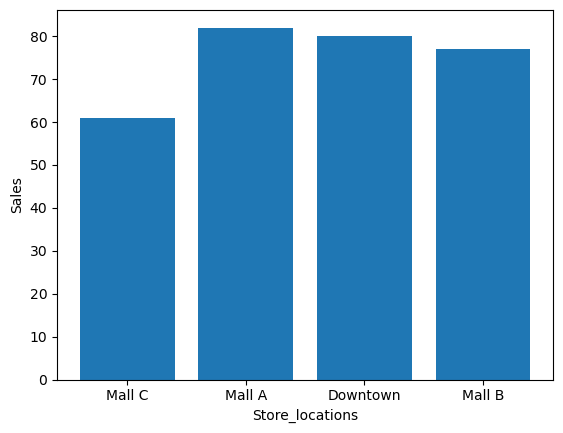

In [8]:
grouped_loc = df.group_by("Store_Location").len()
grouped_loc 
stors = grouped_loc["Store_Location"]
sales = grouped_loc["len"]

plt.bar(stors, sales)
plt.xlabel("Store_locations")
plt.ylabel("Sales")
plt.show()

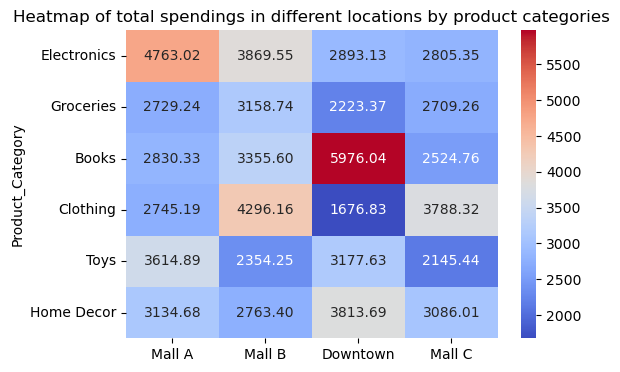

In [ ]:
pivot_df = df.pivot(values="Amount_Spent", index="Product_Category", on="Store_Location", aggregate_function="sum")
heatmap_data = pivot_df.to_pandas().set_index("Product_Category")

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of total spendings in different locations by product categories")
plt.show()